In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tracking_utils import *
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
from particle_filtering import ParticleFiltering, MeanShiftPF

In [2]:
SUB_SAMPLE = 2
DEBUG = True
video = load_video(".\ps6\input\pres_debate.avi", sub_sample=SUB_SAMPLE, skip_frames=3)[:80]
frame = video[0]

loaded 78 frames


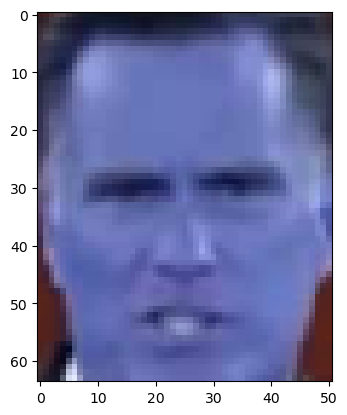

In [3]:
template = np.loadtxt(".\ps6\input\pres_debate.txt") / SUB_SAMPLE
template = template.astype(int)
template_image = frame[template[0][1]:template[0][1] + template[1][1], template[0][0]: template[0][0] + template[1][0]]
plt.imshow(template_image)

In [4]:
# filterer = MeanShiftPF(video[0][:, :, 0].shape, template_image, int(template[1][1]), int(template[1][0]), num_particles=200,weight_regularization=0.1, debug=DEBUG, dynamics_variance=2, template_update_weight=0.3, bins=16)
# if DEBUG:
#     detected, points, templates = filterer.run(video)
# else:
#     detected = filterer.run(video)

In [5]:
# if DEBUG:
#     ani = dual_video(detected, points, templates)
# else:
#     ani = create_video(detected)
# HTML(ani.to_jshtml())

loaded 312 frames


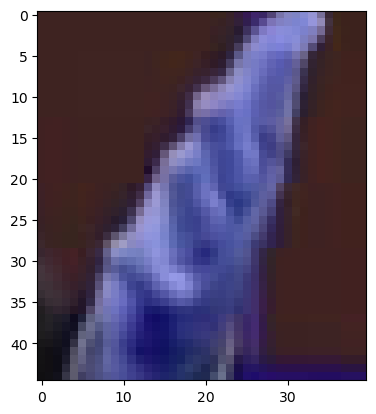

In [6]:
video = load_video(".\ps6\input\pres_debate.avi", sub_sample=SUB_SAMPLE, skip_frames=0)
template = np.loadtxt(".\ps6\input\hand.txt") / SUB_SAMPLE
template = template.astype(int)
template_image = frame[template[0][1]:template[0][1] + template[1][1], template[0][0]: template[0][0] + template[1][0]]
plt.imshow(template_image)

In [7]:
filterer = MeanShiftPF(video[0][:, :, 0].shape, template_image, int(template[1][1]), int(template[1][0]), num_particles=400, weight_regularization=0, debug=DEBUG, dynamics_variance=15, template_update_weight=0.2, bins=16)
if DEBUG:
    detected, points, templates = filterer.run(video)
else:
    detected = filterer.run(video)

  0%|          | 0/312 [00:00<?, ?it/s]D:\Projects\pythonProject\CV\Unit7-Particle_Filtering\particle_filtering.py:144: RuntimeWarning: invalid value encountered in divide
  return 0.5 * np.sum(np.where((hist1 + hist2) == 0, 0, (hist1 - hist2) ** 2 / (hist1 + hist2)))
100%|██████████| 312/312 [02:53<00:00,  1.80it/s]


MovieWriter ffmpeg unavailable; using Pillow instead.


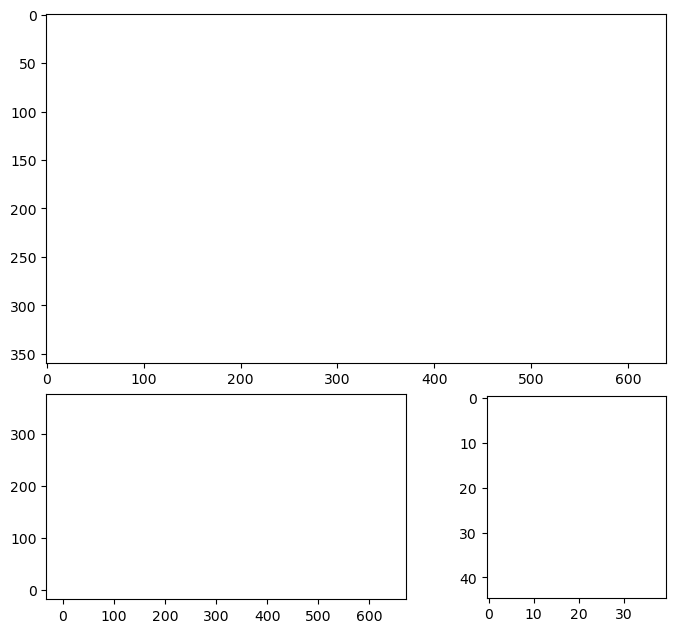

In [8]:
if DEBUG:
    ani = dual_video(detected, points, templates, save=True)
else:
    ani = create_video(detected)
# HTML(ani.to_jshtml())